## Math 565 Homework 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 01

In [2]:
#Find square root of real number a>0
def sqroot_finder(a=5, x_0=5, kmax=20, tol=1e-12):
    xold = x_0
    xnew=0
    k=0
    while (abs(xnew-xold))>tol or k<=kmax:
        xnew = .5*(xold+a/xold)
        xold = xnew
        k += 1
    return xnew
   
#find squre root of a   
a = 5
print("The approximated solution of sqrt(%f) is " %a, sqroot_finder(a))        
#numpy solustion is:
print("The solution of sqrt(%f) given by np.sqrt() is " %a, np.sqrt(5))
#the error vs np.sqrt() is:
np.sqrt(5) - sqroot_finder()
print("the error of approx vs np.sqrt() is ", np.sqrt(5) - sqroot_finder(a))
print("How about that!")

The approximated solution of sqrt(5.000000) is  2.23606797749979
The solution of sqrt(5.000000) given by np.sqrt() is  2.23606797749979
the error of approx vs np.sqrt() is  0.0
How about that!


# Problem 2

In [3]:
#Use the trapezoidal rule to approximate a definite integral
#Trapezoidal rule
def trapz(f,a,b,n=10):
    h = (b-a)/n
    x = np.array([a + i*h for i in range(1,n)])
    sumz = np.sum(f(x))
    return (h/(2))*(f(a)+2*sumz+f(b))

def f(x):
    return 1/(1+x**2)

print("Using our algorithm to evaluate f with n=10 we have: ",trapz(f, 0, 1 ,n=10))
print("Using our algorithm to evaluate f with n=10 we have: ",trapz(f, 0, 1 ,n=20))

Using our algorithm to evaluate f with n=10 we have:  0.7849814972267897
Using our algorithm to evaluate f with n=10 we have:  0.7852939967385322


# Problem 3

**a. How many additions and multiplications are required to evaluae $P(x)$ for a given value of $x$?**

The number of additions required to evaluate $P(x)$ is one less than the number of terms in the polynomial. This occurs becuase addition is a binrary operation. 

To calculate the number of multiplications required consider that the $n^{th}$ term will require n multiplications. To calculate the exponint will require n-1 operations, as it is a binary operation like addition, and and additional multiplication for the coeffecient. Then to evaluate $P(x)$ we will have $\sum_{i=0}^n i = \frac{n^2-n}{2}$ total multiplications.

**b. Can you devise an algorithm that reduces the number of arthmetic operations? How many multiplications and how many additions are required by your algorithm?**

I can't see any feasible way to decease the number of additions as the number of terms in the sum ca't be reduced. The number of multiplications, however, can be reduced.

i. Add the constant term $a_0$ and and the first order term $a_cx$ 

ii. Multiply x and $a_2x$, this will yield $a_2x^2$, add to previous sum, save the value of $x^2$

iii. Continue by multiplying each succesive $a_ix$ by the exponent from the previous term, adding to the previous sum and saving the value of $x^i$ until all of the term are accounted for

This algotrithm will calculate the polynomial with 0 multiplicatons for first term, 1 for the second and 2 for the remaining terms of the polynomial. Then there will be n-1 additions, as before and 2*(n-1)-3 multiplications.

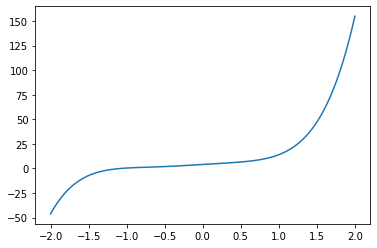

In [8]:
#Polynomial
def polyval(coef,x):
    n = len(list(coef))
    coef = coef[::-1]
    P_x = coef[0] + coef[1]*x
    x_n = np.copy(x)
    for i in range(2,n):
        x_n*= x
        P_x += x_n*coef[i]
    return P_x

coef = [3.1, np.pi, -1, 0, 4.7, 4]
polyval(coef,1)

domain = np.linspace(-2,2,100)
plt.plot(domain, polyval(coef, domain))